#Pre-procesamiento
La base de datos son recolectadas desde Kaggle, son más de 27,000 imagenes de proyectos. Antes de iniciar configuramos el ambiente para el uso del API de Kaggle con los siguientes pasos

##Descarga de las bases de datos

Creamos una cuenta en Kaggle y damos click en el nombre en la cuenta.![](https://drive.google.com/uc?id=1f-sb8XUPaxYQlRdJ0OmdtF5-Vut8UL5w)

Luego crea un nuevo token del API y descargue el archivo en su PC ![](https://drive.google.com/uc?id=1uXnWbnDfRMeJ7b2W2PFNuG6ODYKyJf91)




Se instalan las librerías de kaggle para poder importar data pública desde el sitio web.

In [0]:
!pip install kaggle
!mkdir -p ~/.kaggle

El siguiente código sirve para subir un archivo al sistema de archivos de colab. En nuestro caso subiremos el token

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alonsopuente","key":"43b92568894be3bf825d7f1688950ec7"}'}

Movemos el archivo subido en la celda pasada al directorio creado. Luego le damos permisos especiales archivo

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Cambiamos los permisos
!chmod 600 ~/.kaggle/kaggle.json

Ahora podemos descargar la base de datos de imágenes de proyectos subido públicamente en Kaggle.

In [0]:
!kaggle datasets download -d alonsopuente/kickstarter-projects-images
!ls

100% 2.24G/2.24G [00:18<00:00, 143MB/s]
100% 2.24G/2.24G [00:18<00:00, 127MB/s]
kaggle.json  kickstarter-projects-images.zip  sample_data


Se descomprime la data.


In [0]:
import os
import zipfile

#creamos una carpeta para la BD
os.mkdir("project_images")

zip_train_test = zipfile.ZipFile('kickstarter-projects-images.zip','r')
zip_train_test.extractall('project_images/')
zip_train_test.close()

os.rename('project_images/labeled_projects.csv','labeled_projects.csv')
test_file_path = 'labeled_projects.csv'

Luego de descomprimir, se tiene que cambiar las dimensiones de todas las imágenes y guardar en una nueva carpeta solo aquellas que pudieron re-dimensionarse.

In [0]:
#Ver esto: https://stackoverflow.com/questions/41736711/resizing-all-images-in-a-folder

import glob
import cv2
import shutil

height = 180   #120
width = 180
resized_images_list = []

os.chdir('/content/project_images/images')
images_list = glob.glob('*.png')
os.mkdir('/content/project_images/resized_images')
file_path = '/content/project_images/resized_images'

for i in images_list:
  img_original=cv2.imread(i)
  try:
    img_resized=cv2.resize(img_original, (width,height))
    resized_images_list.append(img_resized)
    height, width, channels = img_resized.shape
    print('New dimensions: ',img_resized.shape)
    cv2.imwrite(os.path.join(file_path, str(i)), img_resized)
  except Exception as e:
    #resized_images_list.append(img_original)
    #cv2.imwrite(os.path.join(file_path, str(i)), img_original)
    pass

os.chdir('/content')
shutil.rmtree('project_images/images')

New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dimensions:  (180, 180, 3)
New dime

In [0]:
#!ls /content/project_images/resized_images | head -20

1000256230.png
1000261018.png
100039820.png
1000468345.png
1000551777.png
1000558429.png
1000590709.png
1000624031.png
1000629643.png
1000654409.png
1000656794.png
1000697657.png
1000776914.png
100078996.png
1001077166.png
1001108678.png
1001132597.png
100114978.png
1001265769.png
1001502333.png


In [0]:
os.remove('/content/project_images/resized_images/1642806426.png')
os.remove('/content/project_images/resized_images/365370629.png')

In [0]:
#len(resized_images_list)   #De las 27,248 imágenes iniciales, quedaron finalmente esta cantidad

27037

In [0]:
#resized_images_list[10]

array([[[ 67,  12,   2],
        [ 72,  15,   3],
        [ 79,  19,   5],
        ...,
        [ 69,  19,   2],
        [ 70,  11,   3],
        [ 71,  17,   4]],

       [[ 37,   2,   2],
        [ 32,   3,   0],
        [ 40,   1,   0],
        ...,
        [ 33,   1,   0],
        [ 46,   2,   1],
        [ 46,   6,   3]],

       [[115,  21,   4],
        [111,  24,   3],
        [117,  22,   3],
        ...,
        [119,  25,   3],
        [110,  20,   4],
        [119,  27,   5]],

       ...,

       [[ 64,  16,   2],
        [ 60,  16,   1],
        [ 74,  23,   4],
        ...,
        [ 71,  20,   3],
        [ 65,  16,   2],
        [ 71,  20,   6]],

       [[ 39,   2,   1],
        [ 37,   0,   0],
        [ 30,   2,   0],
        ...,
        [ 36,   1,   0],
        [ 48,   2,   1],
        [ 44,   4,   3]],

       [[165,  80,  52],
        [167,  79,  55],
        [163,  82,  56],
        ...,
        [164,  80,  55],
        [169,  78,  51],
        [169,  80,  51]]

## Extraer etiquetas de la BD plana
Al descargar las bases de datos de Kaggle, se descargaron tanto un archivo comprimido de imágenes como un archivo de valores separados por coma (.csv) en donde se muestran los estados de cada proyecto (0: failed, 1: successful).

Luego de subir al colab el archivo de etiquetas en .csv, cargarlo

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from pandas import Series
import math
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
data_etiquetas = pd.read_csv("labeled_projects.csv",sep = ',')
data_etiquetas.head()

,id,state
0,1000245024,0
1,1000256230,0
2,1000261018,0
3,100039820,0
4,1000468345,0


Eliminamos los id de las imágenes que no se re-dimensionaron dentro del conjunto de datos.

In [0]:
os.chdir('/content/project_images/resized_images')
images_list = glob.glob('*.png')
os.chdir('/content')

In [0]:
len(images_list)

27035

In [0]:
#images_to_delete = []
#for i in data_etiquetas.id:
#  if (str(i) + '.png') not in images_list:
#    images_to_delete.append(i)
#    print(i)

1000245024
1027265164
1041765851
1044019703
1054657017
1054989753
1093227359
1095756934
1109096552
1110674316
111350551
1117138764
1120478809
1123861916
1126827678
1128156438
1150700505
1167178681
1167412504
1171176145
1185235157
1195689824
1196260545
1196669776
1227245909
123026865
1232162171
125404469
1256302160
1260054574
1261576550
1271185952
1271697108
1273321043
1276268664
1295436613
1312887410
1315773773
1318933353
1330209033
1335140848
1354201116
1357780406
1377366770
1379915496
1382999730
1383492624
1383895969
1417511404
1431552184
1433514155
1440484529
1453210615
1469999815
1471392588
147705510
1480127219
1501633851
1519017410
1525962954
1536346646
1551702099
1557905272
1580025170
1596683891
1597639357
1600980167
1605451234
1605534062
1607478408
1651175038
1658387069
1659350880
1675183980
1676089131
1685376331
170619371
1706658113
1718840874
172918236
175239779
1758745650
1761301134
1765651455
1777726903
1779005619
1789344584
1791360247
1792121743
1795218040
1806016777
181166

In [0]:
### Y este es la lista definitiva de imágenes que no van
### Los 214 de arriba + 2 que no aparecen en descripciones (agregados al final)
### En total hay 27,035 imágenes

images_to_delete = [1000245024, 1027265164, 1041765851, 1044019703, 1054657017, 1054989753, 1093227359, 1095756934, 1109096552,
 1110674316, 111350551, 1117138764, 1120478809, 1123861916, 1126827678, 1128156438, 1150700505, 1167178681, 1167412504, 1171176145,
 1185235157, 1195689824, 1196260545, 1196669776, 1227245909, 123026865, 1232162171, 125404469, 1256302160, 1260054574, 1261576550,
 1271185952, 1271697108, 1273321043, 1276268664, 1295436613, 1312887410, 1315773773, 1318933353, 1330209033, 1335140848, 1354201116,
 1357780406, 1377366770, 1379915496, 1382999730, 1383492624, 1383895969, 1417511404, 1431552184, 1433514155, 1440484529, 1453210615,
 1469999815, 1471392588, 147705510, 1480127219, 1501633851, 1519017410, 1525962954, 1536346646, 1551702099, 1557905272, 1580025170,
 1596683891, 1597639357, 1600980167, 1605451234, 1605534062, 1607478408, 1651175038, 1658387069, 1659350880, 1675183980, 1676089131,
 1685376331, 170619371, 1706658113, 1718840874, 172918236, 175239779, 1758745650, 1761301134, 1765651455, 1777726903, 1779005619,
 1789344584, 1791360247, 1792121743, 1795218040, 1806016777, 1811667704, 1818375181, 1822464577, 1838083992, 1852798207, 185563912,
 186326896, 1886853211, 1895840022, 1912915346, 1912916865, 1916794128, 1924131875, 1931946499, 1933459780, 1942409900, 194542013,
 1948690055, 195935865, 1972722926, 1976430969, 1986576162, 1986844872, 2035788565, 2056552145, 2094632032, 210942640, 211982757,
 2122235677, 2130212538, 2133337075, 215329000, 225178854, 230988891, 241210115, 268503228, 268595326, 282962466, 295300250,
 299064543, 32792165, 358879397, 385003810, 398816783, 405697911, 408987268, 41416256, 420078999, 422991637, 431444590, 45179890,
 455670673, 463339053, 466663836, 471806030, 472068165, 480355077, 49755697, 497564918, 513560589, 515623736, 52687056, 529090953,
 537175035, 545791182, 552855493, 561835082, 569931566, 579260709, 579865810, 583266930, 607713968, 622990457, 626229332, 631512515,
 641599646, 646676789, 658977839, 661260786, 679530293, 688235297, 71055019, 718312567, 733153564, 733447376, 748065478, 752848586,
 794223432, 802437399, 805880945, 814433703, 814709614, 835270646, 837611249, 857130732, 857846936, 87114884, 874656260, 884696456,
 894319374, 912105626, 914270204, 91444505, 916080730, 934292049, 939431746, 943847278, 947601096, 949851993, 951887123, 952231046,
 953415668, 953814050, 958225997, 962905414, 965265217, 97315852, 983812442, 984297627, 99033008, 999748644, 999753943, 99996661,
                 1642806426, 365370629]

In [0]:
#len(images_to_delete)    #Del total de 21,251 proyectos, se borrarán 214 + 2 filas para que coincida con las imágenes

216

In [0]:
#images_to_delete

In [0]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_etiquetas[data_etiquetas['id'].isin(images_to_delete)].index
data_etiquetas.drop(indexNames , inplace=True)
len(data_etiquetas)

27035

Luego, se fracciona el nuevo conjunto de datos en tres partes: Entrenamiento (train), validación (validation) y prueba (test).

In [0]:
# Importando función train_test_split
from sklearn.model_selection import train_test_split

train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(data_etiquetas.id, data_etiquetas.state, test_size=1 - train_ratio, random_state=100)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=100) 

print(x_train, x_val, x_test)
#print(len(x_train), len(x_val), len(x_test))

21459     597416313
27244     999576487
20211     511680172
11856    1843421663
16497     245477679
            ...    
12218    1867686970
24606     813721450
14262    2017950600
23498     736851977
5688     1400313239
Name: id, Length: 21628, dtype: int64 12027    1853794765
26893     975640050
6789     1479305679
22011     637326716
24333     794133165
            ...    
26784     967550694
5319     1373516133
18812      41072673
18004     353349698
6689     1472589810
Name: id, Length: 2703, dtype: int64 22821     690137136
12802    1911120605
18063     357595448
7615     1536288836
7867     1554790037
            ...    
9151     1647826635
640      1046636499
21339     590208656
1876     1130223171
5173     1362556172
Name: id, Length: 2704, dtype: int64


## Organizar imágenes según train, validation y test
Se crean tres carpetas para cada subconjunto y se redirigen las imágenes a su correspondiente.

In [0]:
#Fuente: https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified

os.mkdir('project_images/train')
os.mkdir('project_images/validation')
os.mkdir('project_images/test')

# Source path  
source = 'project_images/resized_images/'
  
# Destination path  
train_path = 'project_images/train'
validation_path = 'project_images/validation'
test_path = 'project_images/test'

for i in x_train:
  if (str(i) + '.png') in images_list:
    shutil.copy(source + (str(i) + '.png'), train_path)

for i in x_val:
  if (str(i) + '.png') in images_list:
    shutil.copy(source + (str(i) + '.png'), validation_path)

for i in x_test:
  if (str(i) + '.png') in images_list:
    shutil.copy(source + (str(i) + '.png'), test_path)

shutil.rmtree('project_images/resized_images')

In [0]:
import glob
print(len(glob.glob("project_images/train/*.png")),len(glob.glob("project_images/validation/*.png")),len(glob.glob("project_images/test/*.png")))

21628 2703 2704


In [0]:
#!ls project_images/test | head -10

Ahora, se tienen que crear 6 vectores (3 de 'X' y 3 de 'Y') a partir de los conjuntos de imágenes y etiquetas para 'X' y 'Y' respectivamente.

In [0]:
# Convertimos los subconjuntos de train, validation y test de las etiquetas a vectores
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(y_train.shape,y_val.shape,y_test.shape)

(21628,) (2703,) (2704,)


Listas finales cargadas a memoria para operación

In [0]:
# Convertimos los subconjuntos de train, validation y test de imágenes a vectores
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_data_from_path(paths):
  listfiles = os.listdir(paths)
  xs = []
  for ii in listfiles:
    x1 = load_img(path=paths+'/'+ii)
    y1 = img_to_array(x1)/255.0
    xs.append(y1)
    del x1
  ds = np.asarray(xs)
  del xs
  return ds

X_train_img = load_data_from_path(train_path)
X_validation_img = load_data_from_path(validation_path)
X_test_img = load_data_from_path(test_path)

Using TensorFlow backend.


In [0]:
print(X_train_img.shape)
print(X_validation_img.shape)
print(X_test_img.shape)

(21628, 180, 180, 3)
(2703, 180, 180, 3)
(2704, 180, 180, 3)


**Verificar estado de memoria manualmente** en la sgte. celda

In [0]:
!free

              total        used        free      shared  buff/cache   available
Mem:       26753328    14251296      418192         896    12083840    19502144
Swap:             0           0           0


Mostramos algunas imagenes de la BD

[0 0 0]


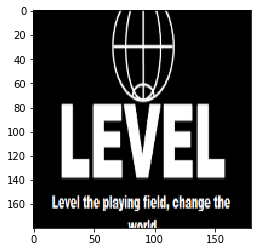

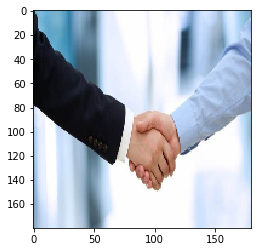

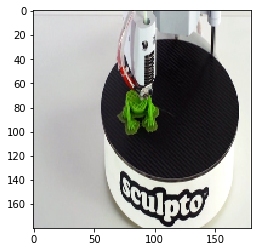

In [0]:
import matplotlib.pyplot as plt

# Conjunto de imágenes de entrenamiento con sus respectivas etiquetas
for image in X_train_img[:3]:
    plt.figure()
    plt.imshow(image)

print(y_train[0:3])

[1 0 0]


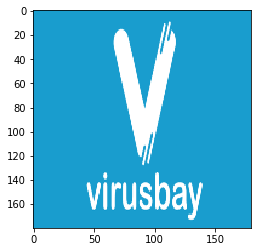

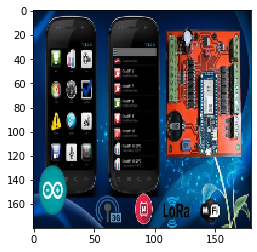

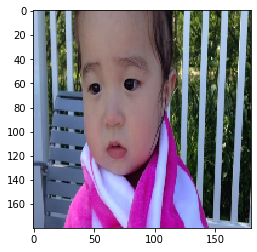

In [0]:
# Conjunto de imágenes de validación con sus respectivas etiquetas
for image in X_validation_img[:3]:
    plt.figure()
    plt.imshow(image)

print(y_val[0:3])

[0 0 1]


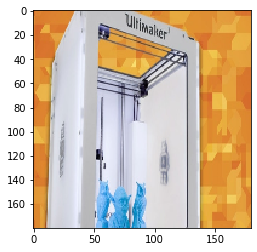

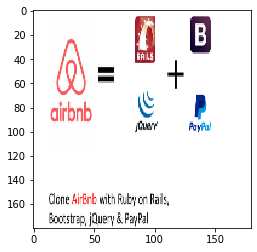

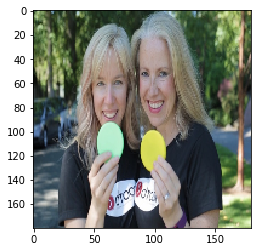

In [0]:
# Conjunto de imágenes de prueba con sus respectivas etiquetas
for image in X_test_img[:3]:
    plt.figure()
    plt.imshow(image)

print(y_test[0:3])

Se guardan los datos cargados.

In [0]:
#np.save('projects_X_train.npy', X_train_img)
#np.save('projects_Y_train.npy', y_train)
#np.save('projects_X_validation.npy', X_validation_img)
#np.save('projects_Y_validation.npy', y_val)
#np.save('projects_X_test.npy', X_test_img)
#np.save('projects_Y_test.npy', y_test)

# Atajo: cargar datos pre-procesados

In [0]:
X_train_img = np.load('projects_X_train.npy')
y_train = np.load('projects_Y_train.npy')
X_validation_img = np.load('projects_X_validation.npy')
y_val = np.load('projects_Y_validation.npy')
X_test_img = np.load('projects_X_test.npy')
y_test = np.load('projects_Y_test.npy')

#Creación de modelos CNN
Keras & tensorflow

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential

import keras
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 1} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

Definimos un capa del modelo VGG pero solo con una convolución de 32 filtros y max pooling para ver el performance que se obtiene. La arquitectura de VGG es la siguiente ![](https://drive.google.com/uc?id=1lcrHW2e2wKUy5QLgvyAZNOkM4zMOxI8n)

In [0]:
# (1) Importando dependencia
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras import optimizers
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.optimizers as optimizers
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils.vis_utils import plot_model
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score,auc, roc_curve, roc_auc_score
from pandas import Series, DataFrame

np.random.seed(1000)

## VGG-19

## VGG pre-entrenado

### Primera prueba

In [0]:
from keras.applications import VGG19
vgg_conv_stop = VGG19(weights='imagenet', include_top=False, input_shape=(height, width, 3))

In [0]:
vgg_conv_stop.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 180, 180, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

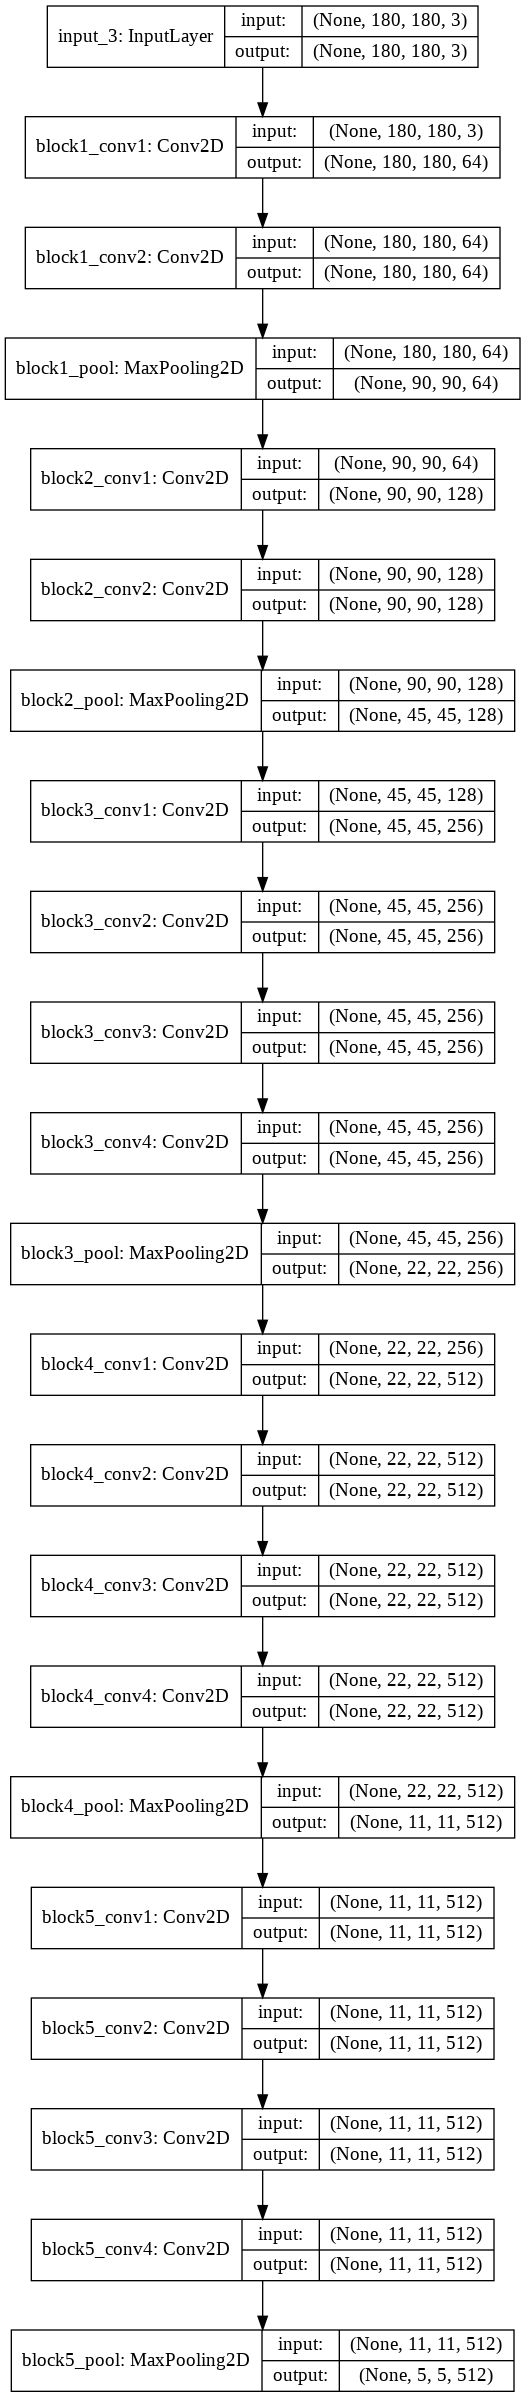

In [0]:
plot_model(vgg_conv_stop, to_file='original_model.png', show_shapes=True, show_layer_names=True)

In [0]:
#vgg_conv_stop.trainable = False
modelVGG = Sequential()
for layer in vgg_conv_stop.layers:
  layer.trainable = False

modelVGG.add(vgg_conv_stop)


# Passing it to a dense layer
modelVGG.add(Flatten())
#Dense lay

modelVGG.add(Dense(256, use_bias=False))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation("relu"))
modelVGG.add(Dropout(0.2))

modelVGG.add(Dense(128, use_bias=False))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation("relu"))
modelVGG.add(Dropout(0.2))


# Output Layer
modelVGG.add(Dense(1, activation='sigmoid'))
modelVGG.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 5, 512)         20024384  
_________________________________________________________________
flatten_10 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               3276800   
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)             

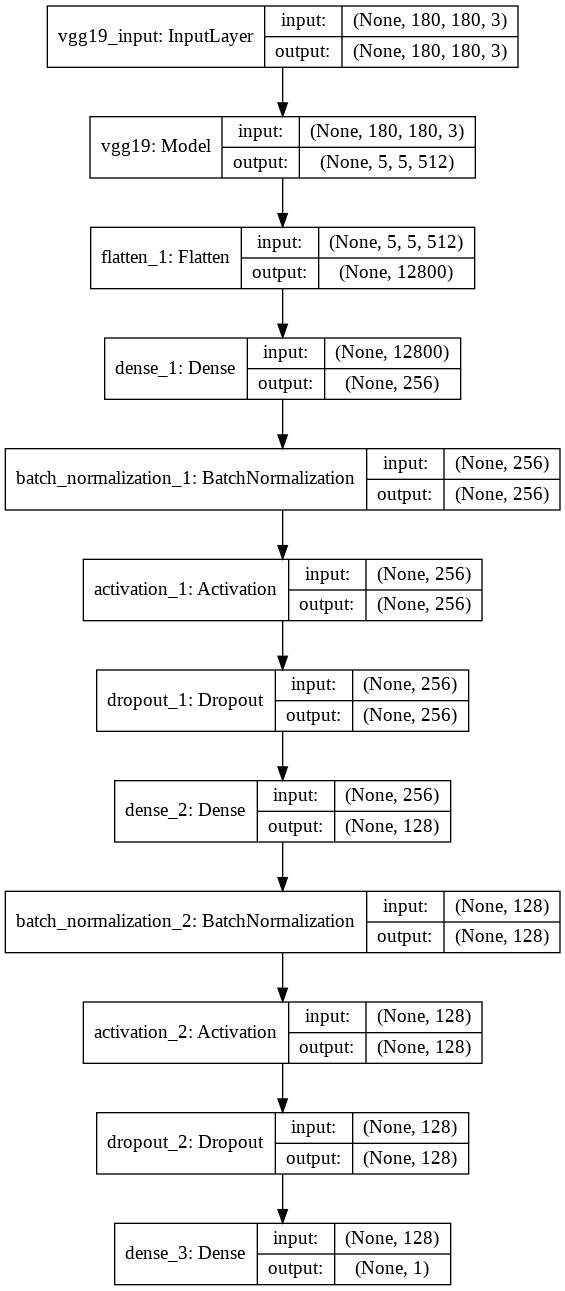

In [0]:
plot_model(modelVGG, to_file='modelincep.png', show_shapes=True, show_layer_names=True)

In [0]:
# labels_dict : {ind_label: count_label}
# mu : parameter to tune 
import numpy as np
from sklearn.utils import class_weight
sample_weights = class_weight.compute_sample_weight('balanced', np.unique(y_train), y_train)
print(sample_weights)

[0.69808276 1.76209875]


In [0]:
#opt = optimizers.Adam(lr = 0.0001)
#modelVGG.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
#callbacks = [              ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', save_best_only=True)]

In [0]:
from keras.callbacks import EarlyStopping, Callback

early_stopper = EarlyStopping(monitor='val_auc', 					
                              min_delta=0.1, 
                              patience=4, 
                              verbose=0, 
                              mode='auto')

In [0]:
from sklearn import metrics
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [0]:
Xt2 = np.concatenate((X_train_img, X_validation_img))
Yt2 = np.concatenate((y_train, y_val))

In [0]:
### La primera opción
#modelVGG.compile(loss='binary_crossentropy', optimizer=opt, metrics=[auc])

modelVGG.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-6, rho=0.7), metrics=[auc])

In [0]:
# (5) Train
from datetime import datetime
start = datetime.now()

hist = modelVGG.fit(Xt2, Yt2, batch_size=64, epochs=200, validation_split=0.15, verbose=1, shuffle=True, class_weight=sample_weights)

stop=datetime.now()
execution_time_m1 = stop-start

#history_cpu = model.fit(X_train,Y_train, batch_size=32, epochs=4,validation_data=(X_test,Y_test),verbose=1)
score = modelVGG.evaluate(X_test_img, y_test,verbose=1)
print('Test loss: ',score[0])
print('Test AUC: ',score[1])

Train on 20681 samples, validate on 3650 samples
Epoch 1/200
20681/20681 [==============================] - 51s 2ms/step - loss: 0.8560 - auc: 0.4949 - val_loss: 0.7956 - val_auc: 0.4988
Epoch 2/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8471 - auc: 0.5011 - val_loss: 0.7880 - val_auc: 0.5004
Epoch 3/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8363 - auc: 0.5019 - val_loss: 0.7810 - val_auc: 0.5017
Epoch 4/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8296 - auc: 0.5025 - val_loss: 0.7792 - val_auc: 0.5034
Epoch 5/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8187 - auc: 0.5042 - val_loss: 0.7716 - val_auc: 0.5050
Epoch 6/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8123 - auc: 0.5058 - val_loss: 0.7713 - val_auc: 0.5067
Epoch 7/200
20681/20681 [==============================] - 49s 2ms/step - loss: 0.8022 - auc: 0.5078 - val_loss: 0.7692 - v

In [0]:
#hist_df = pd.DataFrame(hist.history)

In [0]:
#hist_df.to_csv('history_cnn_model_AUC.csv',sep=',')

In [0]:
score = modelVGG.evaluate(X_test_img, y_test)
print("Test AUC = ",score[1])
print("Test Loss = ",score[0])

2704/2704 [==============================] - 6s 2ms/step
Test AUC =  0.6870549680918632
Test Loss =  0.6817416904946051


In [0]:
print(set(y_test))

{0, 1}


(2.0, 0.0)

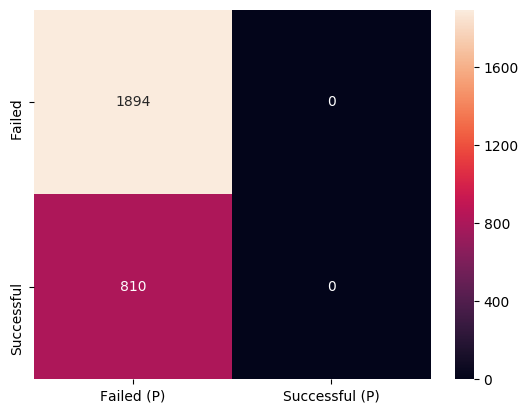

In [0]:
#Importando métricas de scikit-learn para calcular precisión
from sklearn import metrics

plt.rcdefaults()
predict = modelVGG.predict(X_test_img)
predict = np.argmax(predict, axis=1)

confusion = metrics.confusion_matrix(y_test, predict, labels = [0,1])
label_y = ['Failed','Successful']
label_x = ['Failed (P)', 'Successful (P)']
ax = sns.heatmap(confusion, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(y_test, predict))
print('Classification Report')
target_names = ['Failed','Successful']
print(classification_report(y_test, predict, target_names=target_names))

Confusion Matrix
[[1894    0]
 [ 810    0]]
Classification Report
              precision    recall  f1-score   support

      Failed       0.70      1.00      0.82      1894
  Successful       0.00      0.00      0.00       810

    accuracy                           0.70      2704
   macro avg       0.35      0.50      0.41      2704
weighted avg       0.49      0.70      0.58      2704



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


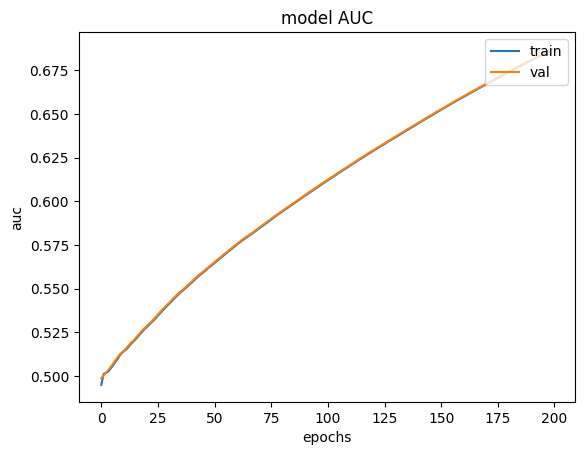

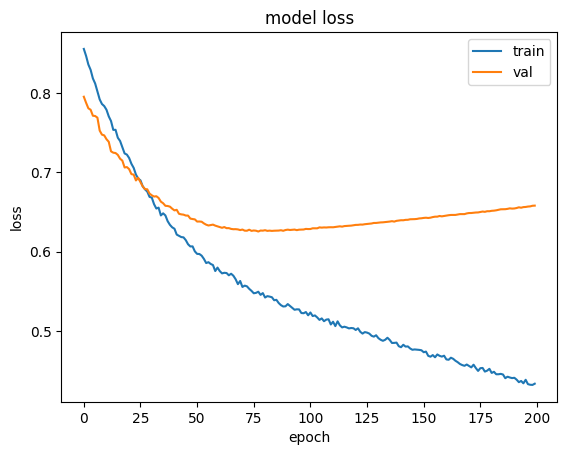

In [0]:
### PROBANDO CON AUC-ROC
# summarize history for loss
plt.figure(1)
plt.plot(hist.history['auc'])
plt.plot(hist.history['val_auc'])
plt.title('model AUC')
plt.ylabel('auc')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [0]:
modelVGG.save_weights("vgg19_l2.h5")

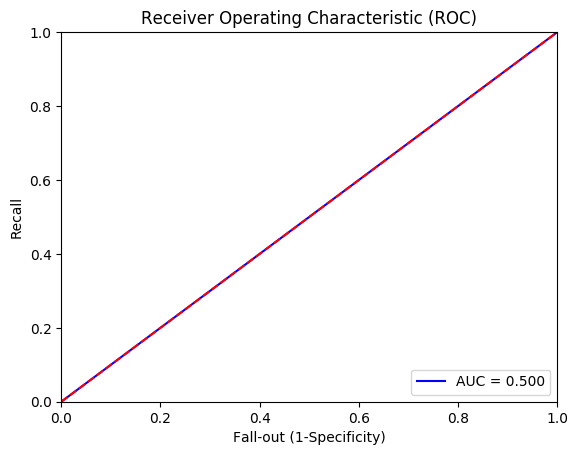

AUC score: 0.5


In [0]:
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predict)
roc_auc_vgg = roc_auc_score(y_test,predict)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_vgg)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_vgg)

In [0]:
gini_1 = (roc_auc_vgg - 0.5) * 2
accuracy_1 = metrics.accuracy_score(y_test, predict)
f1_score_1 = metrics.f1_score(y_test, predict)
recall_score_1 = metrics.recall_score(y_test, predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Segunda prueba

In [0]:
#vgg_conv_stop.trainable = False
modelVGG_2 = Sequential()
for layer in vgg_conv_stop.layers:
  layer.trainable = False

modelVGG_2.add(vgg_conv_stop)


# Passing it to a dense layer
modelVGG_2.add(Flatten())
#Dense lay

modelVGG_2.add(Dense(256, use_bias=False))
modelVGG_2.add(BatchNormalization())
modelVGG_2.add(Activation("relu"))
modelVGG_2.add(Dropout(0.2))

modelVGG_2.add(Dense(128, use_bias=False))
modelVGG_2.add(BatchNormalization())
modelVGG_2.add(Activation("relu"))
modelVGG_2.add(Dropout(0.2))


# Output Layer
modelVGG_2.add(Dense(1, activation='sigmoid'))
modelVGG_2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 5, 5, 512)         20024384  
_________________________________________________________________
flatten_13 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               3276800   
_________________________________________________________________
batch_normalization_25 (Batc (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)             

In [0]:
### La segunda opción
modelVGG_2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-6, rho=0.8),\
 metrics=['accuracy'])

In [0]:
# (5) Train
from datetime import datetime
start = datetime.now()

hist2 = modelVGG_2.fit(Xt2, Yt2, batch_size=64, epochs=150, validation_split=0.15, verbose=1, shuffle=True, class_weight=sample_weights)

stop=datetime.now()
execution_time_m2 = stop-start

#history_cpu = model.fit(X_train,Y_train, batch_size=32, epochs=4,validation_data=(X_test,Y_test),verbose=1)
score = modelVGG_2.evaluate(X_test_img, y_test,verbose=1)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Train on 20681 samples, validate on 3650 samples
Epoch 1/150
20681/20681 [==============================] - 51s 2ms/step - loss: 1.1663 - acc: 0.3292 - val_loss: 1.0392 - val_acc: 0.3159
Epoch 2/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.1517 - acc: 0.3312 - val_loss: 1.0368 - val_acc: 0.3145
Epoch 3/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.1449 - acc: 0.3313 - val_loss: 1.0203 - val_acc: 0.3159
Epoch 4/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.1291 - acc: 0.3364 - val_loss: 1.0137 - val_acc: 0.3170
Epoch 5/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.1202 - acc: 0.3398 - val_loss: 0.9940 - val_acc: 0.3216
Epoch 6/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.1050 - acc: 0.3392 - val_loss: 0.9991 - val_acc: 0.3175
Epoch 7/150
20681/20681 [==============================] - 49s 2ms/step - loss: 1.0913 - acc: 0.3402 - val_loss: 0.9877 - v

In [0]:
hist_df_2 = pd.DataFrame(hist2.history)
hist_df_2.to_csv('history_cnn_model_auc.csv',sep=',')

In [0]:
print("Test accuracy = ",score[1])
print("Test Loss = ",score[0])

Test accuracy =  0.6560650887573964
Test Loss =  0.6748270748635016


(2.0, 0.0)

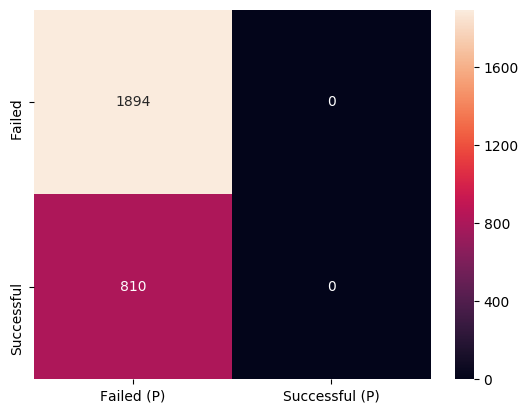

In [0]:
#Importando métricas de scikit-learn para calcular precisión
from sklearn import metrics

plt.rcdefaults()
predict2 = modelVGG_2.predict(X_test_img)
predict2 = np.argmax(predict2, axis=1)

confusion_2 = metrics.confusion_matrix(y_test, predict2, labels = [0,1])
label_y = ['Failed','Successful']
label_x = ['Failed (P)', 'Successful (P)']
ax_2 = sns.heatmap(confusion_2, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".0f")
bottom, top = ax_2.get_ylim()
ax_2.set_ylim(bottom + 0.5, top - 0.5)

In [0]:
print('Confusion Matrix')
print(confusion_matrix(y_test, predict2))
print('Classification Report')
target_names = ['Failed','Successful']
print(classification_report(y_test, predict2, target_names=target_names))

Confusion Matrix
[[1894    0]
 [ 810    0]]
Classification Report
              precision    recall  f1-score   support

      Failed       0.70      1.00      0.82      1894
  Successful       0.00      0.00      0.00       810

    accuracy                           0.70      2704
   macro avg       0.35      0.50      0.41      2704
weighted avg       0.49      0.70      0.58      2704



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


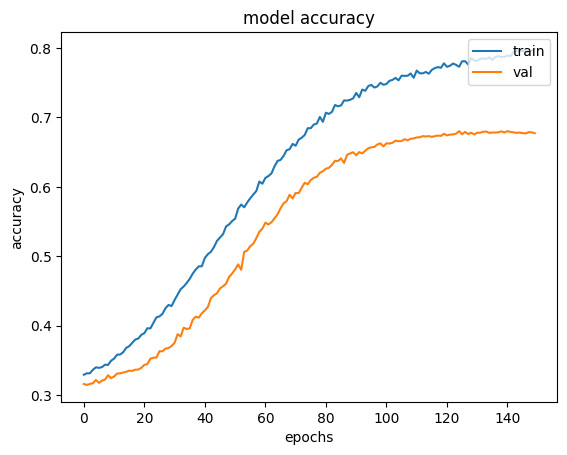

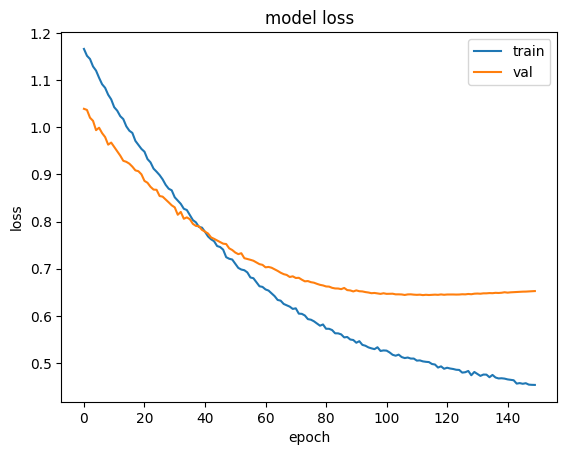

In [0]:
### PROBANDO CON ACCURACY
# summarize history for loss
plt.figure(1)
plt.plot(hist2.history['acc'])
plt.plot(hist2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for loss
plt.figure(2)
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

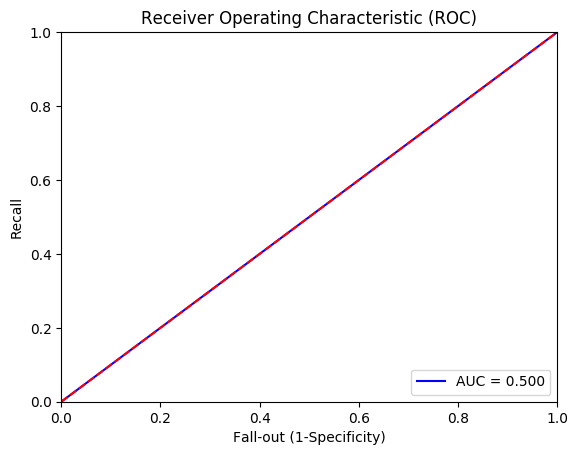

AUC score: 0.5


In [0]:
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(y_test, predict2)
roc_auc_vgg_2 = roc_auc_score(y_test,predict2)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_vgg_2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc_vgg_2)

In [0]:
gini_2 = (roc_auc_vgg_2 - 0.5) * 2
accuracy_2 = metrics.accuracy_score(y_test, predict2)
f1_score_2 = metrics.f1_score(y_test, predict2)
recall_score_2 = metrics.recall_score(y_test, predict2)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
comparison = {'Accuracy score': (accuracy_1),'AUC score': (roc_auc_vgg),'Recall score':(recall_score_1),'F1 score':(f1_score_1)}
comparison["Gini"]=(gini_1)
comparison["execution time"]=(execution_time_m1)

In [0]:
comparison = DataFrame(comparison, index = ['Modelo VGG-19'])
comparison

,Accuracy score,AUC score,Recall score,F1 score,Gini,execution time
Modelo VGG-19,0.700444,0.5,0.0,0.0,0.0,02:43:19.260905


¿Hay overfitting? Leer esto:
* https://www.aprendemachinelearning.com/que-es-overfitting-y-underfitting-y-como-solucionarlo/
* https://stackoverflow.com/questions/55444737/validation-loss-much-higher-than-training-loss

In [0]:
!cat /proc/meminfo


MemTotal:       26753332 kB
MemFree:          219672 kB
MemAvailable:   19597160 kB
Buffers:           89876 kB
Cached:         13786300 kB
SwapCached:            0 kB
Active:         12222316 kB
Inactive:       13403780 kB
Active(anon):    6248396 kB
Inactive(anon):   136520 kB
Active(file):    5973920 kB
Inactive(file): 13267260 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               268 kB
Writeback:             0 kB
AnonPages:      11749860 kB
Mapped:           962180 kB
Shmem:            137084 kB
Slab:             607600 kB
SReclaimable:     554192 kB
SUnreclaim:        53408 kB
KernelStack:        4848 kB
PageTables:        49048 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13376664 kB
Committed_AS:   23740776 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:   4911104 kB
ShmemHugePages:  

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score , recall_score, classification_report

In [0]:
score = modelVGG.evaluate(X_test_img, y_test,verbose=1)
print('Test loss: ',score[0])
print('Test AUC: ',score[1])

2704/2704 [==============================] - 6s 2ms/step
Test loss:  0.6817416904946051
Test AUC:  0.6867380956926289


In [0]:
y_pred = modelVGG.predict(X_test_img,verbose=1).ravel()
y_pred = np.round(y_pred)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print(np.sum(y_pred))

2704/2704 [==============================] - 5s 2ms/step
268.0


In [0]:
print(y_pred.tolist())

[0.7360455989837646, 0.6895102858543396, 0.31374871730804443, 0.568462073802948, 0.35829275846481323, 0.2848348915576935, 0.24978986382484436, 0.3067076802253723, 0.28760990500450134, 0.3195325434207916, 0.16224491596221924, 0.5585178136825562, 0.10951346158981323, 0.19850534200668335, 0.49331942200660706, 0.27704310417175293, 0.20112216472625732, 0.27013465762138367, 0.38995397090911865, 0.2250334918498993, 0.08745944499969482, 0.5367904305458069, 0.18304955959320068, 0.4292614161968231, 0.4317660927772522, 0.17213642597198486, 0.21515795588493347, 0.16898679733276367, 0.2997070550918579, 0.3778952658176422, 0.19590997695922852, 0.20058733224868774, 0.36294323205947876, 0.1071670651435852, 0.4290546774864197, 0.6709865927696228, 0.18500211834907532, 0.538059413433075, 0.30697178840637207, 0.4502016603946686, 0.3357953429222107, 0.19845876097679138, 0.5832814574241638, 0.3952687680721283, 0.2976927161216736, 0.4681778848171234, 0.2570204734802246, 0.18898501992225647, 0.413218468427658

In [0]:
print(y_test.tolist())

[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 

In [0]:
print(classification_report(y_test.tolist(), y_pred.tolist(), target_names=['Failed','Successful']))

              precision    recall  f1-score   support

      Failed       0.70      0.90      0.79      1894
  Successful       0.30      0.10      0.15       810

    accuracy                           0.66      2704
   macro avg       0.50      0.50      0.47      2704
weighted avg       0.58      0.66      0.60      2704



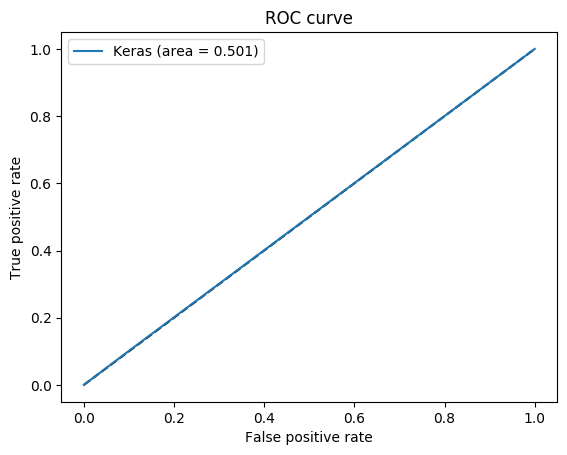

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [0]:
all_weights = []
vgg_weights = modelVGG.get_weights()
all_weights.extend([vgg_weights])

# Guardando los pesos solo de la penúltima capa (128 características)
dataframe_vgg_weights = pd.DataFrame(vgg_weights[42], columns=['VGG-19_128_weights']) 
print (dataframe_vgg_weights)
dataframe_vgg_weights.to_csv('images_weights.csv', index = None, header=True)

     VGG-19_128_weights
0              0.145022
1             -0.037053
2             -0.046004
3              0.162027
4              0.009576
..                  ...
123           -0.043738
124           -0.234635
125           -0.078281
126           -0.149236
127           -0.220001

[128 rows x 1 columns]


# Guardar modelo

In [0]:
from keras.models import load_model

# save the model to disk
modelVGG.save('images_model.h5')